In [112]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [113]:
data_dir = r'E:\course\training\Car vs Bike\Car-Bike-Dataset'
os.listdir(os.path.join(data_dir, 'bike'))

['Bike (1).jpeg',
 'Bike (1).jpg',
 'Bike (1).png',
 'Bike (10).jpeg',
 'Bike (10).jpg',
 'Bike (10).png',
 'Bike (100).jpeg',
 'Bike (100).jpg',
 'Bike (1000).jpeg',
 'Bike (1001).jpeg',
 'Bike (1002).jpeg',
 'Bike (1003).jpeg',
 'Bike (1004).jpeg',
 'Bike (1005).jpeg',
 'Bike (1006).jpeg',
 'Bike (1007).jpeg',
 'Bike (1008).jpeg',
 'Bike (1009).jpeg',
 'Bike (101).jpeg',
 'Bike (101).jpg',
 'Bike (1010).jpeg',
 'Bike (1011).jpeg',
 'Bike (1012).jpeg',
 'Bike (1013).jpeg',
 'Bike (1014).jpeg',
 'Bike (1015).jpeg',
 'Bike (1016).jpeg',
 'Bike (1017).jpeg',
 'Bike (1018).jpeg',
 'Bike (1019).jpeg',
 'Bike (102).jpeg',
 'Bike (102).jpg',
 'Bike (1020).jpeg',
 'Bike (1021).jpeg',
 'Bike (1022).jpeg',
 'Bike (1023).jpeg',
 'Bike (1024).jpeg',
 'Bike (1025).jpeg',
 'Bike (1026).jpeg',
 'Bike (1027).jpeg',
 'Bike (1028).jpeg',
 'Bike (1029).jpeg',
 'Bike (103).jpeg',
 'Bike (103).jpg',
 'Bike (1030).jpeg',
 'Bike (1031).jpeg',
 'Bike (1032).jpeg',
 'Bike (1033).jpeg',
 'Bike (1034).jpeg',
 '

In [114]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)
    

Bike (1).jpeg
Bike (1).jpg
Bike (1).png
Bike (10).jpeg
Bike (10).jpg
Bike (10).png
Bike (100).jpeg
Bike (100).jpg
Bike (1000).jpeg
Bike (1001).jpeg
Bike (1002).jpeg
Bike (1003).jpeg
Bike (1004).jpeg
Bike (1005).jpeg
Bike (1006).jpeg
Bike (1007).jpeg
Bike (1008).jpeg
Bike (1009).jpeg
Bike (101).jpeg
Bike (101).jpg
Bike (1010).jpeg
Bike (1011).jpeg
Bike (1012).jpeg
Bike (1013).jpeg
Bike (1014).jpeg
Bike (1015).jpeg
Bike (1016).jpeg
Bike (1017).jpeg
Bike (1018).jpeg
Bike (1019).jpeg
Bike (102).jpeg
Bike (102).jpg
Bike (1020).jpeg
Bike (1021).jpeg
Bike (1022).jpeg
Bike (1023).jpeg
Bike (1024).jpeg
Bike (1025).jpeg
Bike (1026).jpeg
Bike (1027).jpeg
Bike (1028).jpeg
Bike (1029).jpeg
Bike (103).jpeg
Bike (103).jpg
Bike (1030).jpeg
Bike (1031).jpeg
Bike (1032).jpeg
Bike (1033).jpeg
Bike (1034).jpeg
Bike (1035).jpeg
Bike (1036).jpeg
Bike (1037).jpeg
Bike (1038).jpeg
Bike (1039).jpeg
Bike (104).jpeg
Bike (104).jpg
Bike (1040).jpeg
Bike (1041).jpeg
Bike (1042).jpeg
Bike (1043).jpeg
Bike (1044).jp

In [116]:
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

In [117]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_type_accepted_by_tf:
                print('img_type_not_accepted_by_tf'.format(image_path))
                os.remove(image_path)
        except exception as e:
            print('issue with image'.format(image_path))

In [22]:
show = cv2.imread(os.path.join(data_dir,'bike','Bike (100).jpeg'))
show.shape

(174, 290, 3)

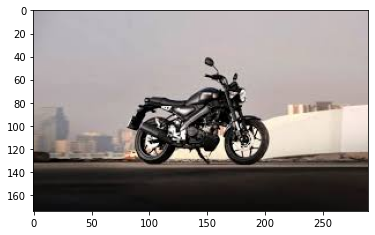

In [23]:
plt.imshow(cv2.cvtColor(show ,cv2.COLOR_BGR2RGB))
plt.show()

In [120]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3981 files belonging to 2 classes.


In [121]:
data_iterator = data.as_numpy_iterator()

In [122]:
batch = data_iterator.next()

In [128]:
len(batch)
#batch[0].shape
batch[1]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

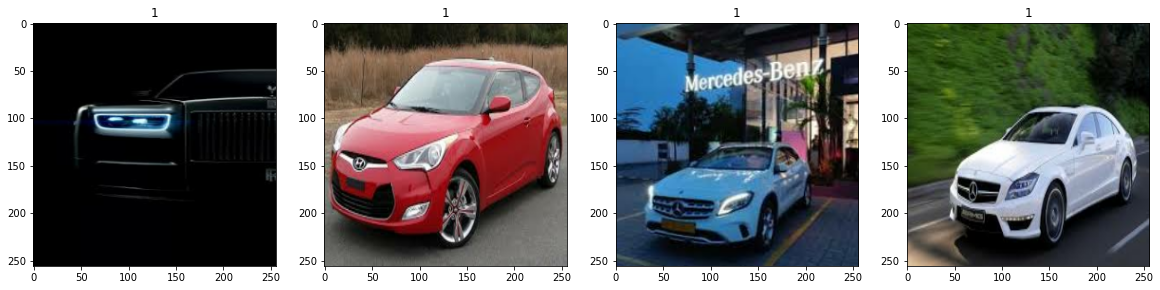

In [126]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [127]:
scaled = batch[0] / 255

In [41]:
scaled.max()

1.0

In [78]:
data = data.map(lambda x,y:(x/255 , y))

In [79]:
scaled_iterator = data.as_numpy_iterator()

In [80]:
batch = scaled_iterator.next()

In [81]:
batch[0].max()

1.0

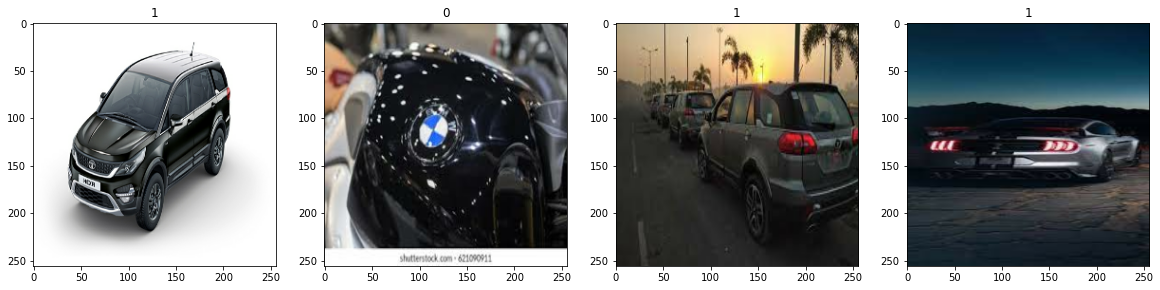

In [82]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [83]:
len(data)

125

In [84]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [85]:
train_size+val_size+test_size

125

In [87]:
test_size

13

In [88]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [89]:
len(test)

13

In [90]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1 , activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [91]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [93]:
logdir = 'logs'

In [94]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [95]:
hist = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
87/87 [==============================] - 103s 1s/step - loss: 0.5592 - accuracy: 0.7144 - val_loss: 0.3251 - val_accuracy: 0.8550
Epoch 2/10
87/87 [==============================] - 101s 1s/step - loss: 0.2452 - accuracy: 0.9070 - val_loss: 0.2441 - val_accuracy: 0.9050
Epoch 3/10
87/87 [==============================] - 105s 1s/step - loss: 0.1617 - accuracy: 0.9389 - val_loss: 0.2047 - val_accuracy: 0.9250
Epoch 4/10
87/87 [==============================] - 108s 1s/step - loss: 0.1183 - accuracy: 0.9551 - val_loss: 0.2136 - val_accuracy: 0.9225
Epoch 5/10
87/87 [==============================] - 107s 1s/step - loss: 0.0615 - accuracy: 0.9792 - val_loss: 0.2439 - val_accuracy: 0.9175
Epoch 6/10
87/87 [==============================] - 107s 1s/step - loss: 0.0506 - accuracy: 0.9824 - val_loss: 0.2777 - val_accuracy: 0.9250
Epoch 7/10
87/87 [==============================] - 109s 1s/step - loss: 0.0377 - accuracy: 0.9899 - val_loss: 0.1938 - val_accuracy: 0.9425
Epoch 8/10
87

In [96]:
hist.history

{'loss': [0.5592392683029175,
  0.24523720145225525,
  0.16166624426841736,
  0.11828015744686127,
  0.06148280203342438,
  0.05055416747927666,
  0.037732210010290146,
  0.0157048050314188,
  0.00956208910793066,
  0.0021677047479897738],
 'accuracy': [0.7144396305084229,
  0.9069684147834778,
  0.9389367699623108,
  0.9551005959510803,
  0.9791666865348816,
  0.9823994040489197,
  0.9899425506591797,
  0.9967672228813171,
  0.9982040524482727,
  1.0],
 'val_loss': [0.32511821389198303,
  0.24406738579273224,
  0.20470041036605835,
  0.2135944366455078,
  0.24393177032470703,
  0.27772876620292664,
  0.1938185691833496,
  0.324863076210022,
  0.3155258893966675,
  0.326893150806427],
 'val_accuracy': [0.8550000190734863,
  0.9049999713897705,
  0.925000011920929,
  0.9225000143051147,
  0.9175000190734863,
  0.925000011920929,
  0.9424999952316284,
  0.9262499809265137,
  0.9300000071525574,
  0.9424999952316284]}

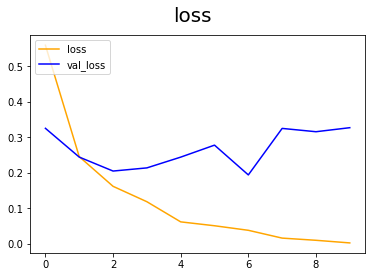

In [97]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='orange', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

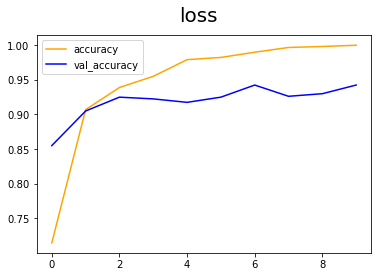

In [98]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [99]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [100]:
len(test)

13

In [101]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 126ms/step


In [104]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, BinaryAccuracy:{acc.result().numpy()}')

Precision:0.9627659320831299, Recall:0.9141414165496826, BinaryAccuracy:0.9395465850830078
